<a href="https://colab.research.google.com/github/nickskywolf/CodeCrafters/blob/main/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN

# Задаємо кількість слів у відгуку та обмежуємо максимальну довжину
max_features = 10000  # обмежуємо кількість слів до 10,000
maxlen = 200  # обмежуємо довжину відгуку до 200 слів

# Завантажуємо дані та розділяємо на тренувальний та тестувальний набори
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Обмежуємо довжину відгуків
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Функція для створення та компіляції моделі
def create_model(model_type):
    model = Sequential()

    if model_type == "RNN":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(SimpleRNN(64))
    elif model_type == "LSTM":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(LSTM(64))
    elif model_type == "Bidirectional LSTM":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(Bidirectional(LSTM(64)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Створюємо та компілюємо моделі
rnn_model = create_model("RNN")
lstm_model = create_model("LSTM")
bidirectional_lstm_model = create_model("Bidirectional LSTM")

# Тренуємо моделі
rnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
bidirectional_lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 91s 114ms/step - loss: 0.5983 - accuracy: 0.6629 - val_loss: 0.5337 - val_accuracy: 0.7346
Epoch 2/5
782/782 [==============================] - 90s 116ms/step - loss: 0.4815 - accuracy: 0.7736 - val_loss: 0.5794 - val_accuracy: 0.6927
Epoch 3/5
782/782 [==============================] - 89s 114ms/step - loss: 0.5278 - accuracy: 0.7340 - val_loss: 0.6298 - val_accuracy: 0.6323
Epoch 4/5
782/782 [==============================] - 89s 113ms/step - loss: 0.4793 - accuracy: 0.7696 - val_loss: 0.6112 - val_accuracy: 0.6663
Epoch 5/5
782/782 [==============================] - 81s 103ms/step - loss: 0.4117 - accuracy: 0.8131 - val_loss: 0.5454 - val_accuracy: 0.7521
Epoch 1/5
782/782 [==============================] - 162s 203ms/step - loss: 0.4111 - accuracy: 0.8113 - val_loss: 0.3441 - val_accuracy: 0.8530
Epoch 2/5
782/782 [==============================] - 160s 205ms/step - loss: 0.2465 - accuracy: 0.9038 - val_loss: 0.3571 - val_accurac

In [1]:
import matplotlib.pyplot as plt

# Точність моделей на тестових даних
rnn_accuracy = rnn_model.evaluate(x_test, y_test)[1]
lstm_accuracy = lstm_model.evaluate(x_test, y_test)[1]
bidirectional_lstm_accuracy = bidirectional_lstm_model.evaluate(x_test, y_test)[1]

# Виведення результатів
print("Результати порівняння точності моделей на тестових даних:")
print(f"Проста RNN: {rnn_accuracy}")
print(f"LSTM: {lstm_accuracy}")
print(f"Bidirectional LSTM: {bidirectional_lstm_accuracy}")

# Візуалізація результатів
plt.bar(['RNN', 'LSTM', 'Bidirectional LSTM'], [rnn_accuracy, lstm_accuracy, bidirectional_lstm_accuracy])
plt.xlabel('Модель')
plt.ylabel('Точність')
plt.title('Порівняння точності моделей')
plt.show()

# Висновок
print("Висновок:")
if bidirectional_lstm_accuracy > lstm_accuracy and bidirectional_lstm_accuracy > rnn_accuracy:
    print("Модель Bidirectional LSTM показала найкращі результати.")
elif lstm_accuracy > rnn_accuracy:
    print("Модель LSTM показала найкращі результати.")
else:
    print("Модель Simple RNN показала найкращі результати.")


NameError: name 'rnn_model' is not defined

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
782/782 [==============================] - 187s 231ms/step - loss: 0.5523 - accuracy: 0.7140 - val_loss: 0.4500 - val_accuracy: 0.8021
Epoch 2/5
782/782 [==============================] - 158s 202ms/step - loss: 0.4672 - accuracy: 0.7828 - val_loss: 0.6188 - val_accuracy: 0.6428
Epoch 3/5
782/782 [==============================] - 148s 190ms/step - loss: 0.5319 - accuracy: 0.7273 - val_loss: 0.5843 - val_accuracy: 0.6851
Epoch 4/5
782/782 [==============================] - 157s 200ms/step - loss: 0.4290 - accuracy: 0.8028 - val_loss: 0.5956 - val_accuracy: 0.6931
Epoch 5/5
782/782 [==============================] - 155s 198ms/step - loss: 0.3427 - accuracy: 0.8516 - val_loss: 0.5128 - val_accuracy: 0.7745
Epoch 1/5
782/782 [==============================] - 43s 51ms/step - loss: 0.3937 - accuracy: 0.8224 - val_loss: 0.3278 - val_accuracy: 0.8663
Epoch 2/5
782/782 [==============================] - 17s 22ms/step 

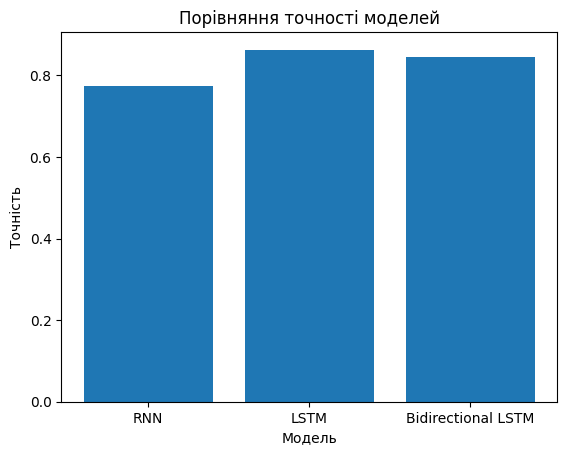

Висновок:
Модель LSTM показала найкращі результати.


In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, SimpleRNN

# Задаємо кількість слів у відгуку та обмежуємо максимальну довжину
max_features = 10000  # обмежуємо кількість слів до 10,000
maxlen = 200  # обмежуємо довжину відгуку до 200 слів

# Завантаження данних та розділення на тренувальний та тестувальний набори
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Обмеження довжини відгуків
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Функція для створення та компіляції моделі
def create_model(model_type):
    model = Sequential()

    if model_type == "RNN":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(SimpleRNN(64))
    elif model_type == "LSTM":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(LSTM(64))
    elif model_type == "Bidirectional LSTM":
        model.add(Embedding(max_features, 128, input_length=maxlen))
        model.add(Bidirectional(LSTM(64)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Створення та компіляція моделей
rnn_model = create_model("RNN")
lstm_model = create_model("LSTM")
bidirectional_lstm_model = create_model("Bidirectional LSTM")

# Тренування моделей
rnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
bidirectional_lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Порівняння та виведення результатів
import matplotlib.pyplot as plt

# Точність моделей на тестових даних
rnn_accuracy = rnn_model.evaluate(x_test, y_test)[1]
lstm_accuracy = lstm_model.evaluate(x_test, y_test)[1]
bidirectional_lstm_accuracy = bidirectional_lstm_model.evaluate(x_test, y_test)[1]

# Виведення результатів
print("Результати порівняння точності моделей на тестових даних:")
print(f"Проста RNN: {rnn_accuracy}")
print(f"LSTM: {lstm_accuracy}")
print(f"Bidirectional LSTM: {bidirectional_lstm_accuracy}")

# Візуалізація результатів
plt.bar(['RNN', 'LSTM', 'Bidirectional LSTM'], [rnn_accuracy, lstm_accuracy, bidirectional_lstm_accuracy])
plt.xlabel('Модель')
plt.ylabel('Точність')
plt.title('Порівняння точності моделей')
plt.show()

# Висновок
print("Висновок:")
if bidirectional_lstm_accuracy > lstm_accuracy and bidirectional_lstm_accuracy > rnn_accuracy:
    print("Модель Bidirectional LSTM показала найкращі результати.")
elif lstm_accuracy > rnn_accuracy:
    print("Модель LSTM показала найкращі результати.")
else:
    print("Модель Simple RNN показала найкращі результати.")


Порівнюючи ці графіки, можна зробити висновки про те, яка модель (LSTM, Bidirectional LSTM або RNN) найкраще підходить для класифікації рецензій на датасеті imdb згідно з метрикою точності на валідаційних даних протягом епох.